In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import *
from urllib.request import urlretrieve

In [8]:
temp = pd.read_csv("degrees.csv")

In [9]:
def Pfun(mr, br, y):
    temp[y] = temp.celsius*mr+br
    return temp[y]

In [5]:
# Started with +- 20% error

In [14]:
# m = pendiente / b = yIntercept / a = learning rate
# h = tolerancia / epochs = epocas / y = predictModel / ym = Model
def Gradent(m, b, a, h, epochs, y, ym):
    trabajom2 = True
    trabajob2 = True
    temp[y] = Pfun(m,b,y)
    x = a
    y0 = temp[ym]
    b2 = b
    m2 = m
    i = 0
    while true:
        if trabajob2:
            dfdb2 = ((1/len(temp))*np.sum(np.square(Pfun(m2,b2+h, y) - y0)) - (1/len(temp))*np.sum(np.square(Pfun(m2, b2, y) - y0)))/h
            b2 -= a*dfdb2
            temp[y] = Pfun(m2, b2, y)
            dMCEdb2_1 = ((1/len(temp))*np.sum(np.square(Pfun(m2,b2+h, y) - y0)) - (1/len(temp))*np.sum(np.square(Pfun(m2, b2, y) - y0)))/h
            
        if trabajom2:
            dfdm2 = ((1/len(temp))*np.sum(np.square(Pfun(m2+h, b2, y) - y0)) - (1/len(temp))*np.sum(np.square(Pfun(m2, b2, y) - y0)))/h
            m2 -= a*dfdm2
            temp[y] = Pfun(m2, b2, y)
            dMCEdm2_1 = ((1/len(temp))*np.sum(np.square(Pfun(m2+h, b2, y) - y0)) - (1/len(temp))*np.sum(np.square(Pfun(m2, b2, y) - y0)))/h
            
        if trabajom2 and (dfdm2 - dMCEdm2_1) < x:
            trabajom2 = False
            
        if trabajob2 and (dfdb2 - dMCEdb2_1) < x:
            trabajob2 = False
            
        if not trabajob2 and not trabajom2:
            a = a * 10**-1
            x = x * 10**-2
            trabajob2 = True
            trabajom2 = True
            
        if i == epochs:
            MCE = (1/len(temp))*np.sum(np.square(Pfun(m2, b2, y) - y0))
            break
        i += 1
    
    sns.set_style("darkgrid")
    fig, ax = plt.subplots(1,1, figsize=(4,4))
    sns.lineplot(x=temp.celsius, y=y0, ax=ax)
    sns.scatterplot(x=temp.celsius, y=y0, ax=ax, color='blue', alpha=0.35)
    sns.lineplot(x=temp.celsius, y=Pfun(m,b,y), ax=ax)
    ax.plot()
    return [m2, b2, MCE]

In [7]:
# Probamos la lógica con Fahrenheit
m2 = 1.8
trabajom2 = True
b2 = 31.95
trabajob2 = True
h = 0.0001
temp["Pfahrenheit"] = m2*temp.celsius + b2
a = 0.001
epochs = 1000
x = 100 * a
dfdm2 = (1/len(temp))*np.sum(2*(temp.Pfahrenheit - temp.fahrenheit)*temp.Pfahrenheit)
dfdb2 = ((1/len(temp))*np.sum(np.square(Pfun(m2,b2+h,"Pfahrenheit") - temp.fahrenheit)) - (1/len(temp))*np.sum(np.square(Pfun(m2,b2,"Pfahrenheit") - temp.fahrenheit)))/h
i = 0
while true:
    if trabajob2:
        dfdb2 = ((1/len(temp))*np.sum(np.square(Pfun(m2,b2+h,"Pfahrenheit") - temp.fahrenheit)) - (1/len(temp))*np.sum(np.square(Pfun(m2,b2,"Pfahrenheit") - temp.fahrenheit)))/h
        b2 -= a*dfdb2
        temp["Pfahrenheit"] = m2*temp.celsius + b2
        dMCEdb2_1 = (1/len(temp))*np.sum(2*(temp.Pfahrenheit - temp.fahrenheit)*temp.Pfahrenheit)
    if trabajom2:
        dfdm2 = ((1/len(temp))*np.sum(np.square(Pfun(m2+h,b2,"Pfahrenheit") - temp.fahrenheit)) - (1/len(temp))*np.sum(np.square(Pfun(m2+h,b2,"Pfahrenheit") - temp.fahrenheit)))/h
        m2 -= a*dfdm2
        temp["Pfahrenheit"] = m2*temp.celsius + b2
        dMCEdm2_1 = (1/len(temp))*np.sum(2*(temp.Pfahrenheit - temp.fahrenheit)*temp.Pfahrenheit)
    MCE2 = (1/len(temp))*np.sum(np.square(temp.Pfahrenheit - temp.fahrenheit))
    if trabajom2 and (dfdm2 - dMCEdm2_1) < x:
        trabajom2 = False
    if trabajob2 and (dfdb2 - dMCEdb2_1) < x:
        trabajob2 = False
    if not trabajob2 and not trabajom2:
        a = a * 10**-1
        x = x * 10**-2
        trabajob2 = True
        trabajom2 = True
        print(trabajob2, trabajom2, i)
    if i == epochs:
        break
    i += 1
print(m2,b2)

1.8 31.99321702004956


0.7999999948048573 -0.659990000000001 1.4789017118578428e-13


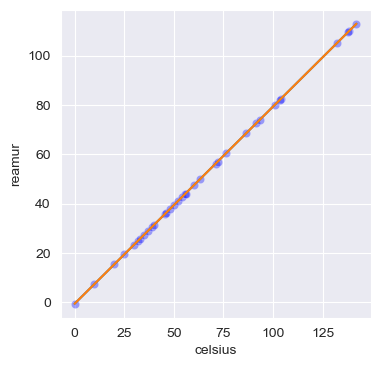

In [15]:
#Started with 1.2, 2
m, b, MSE = Gradent(0.8, -0.65999, 0.00000001, 0.0000001, 1000, "Preamur", "reamur")
print(m, b, MSE)

1.8783451141551748 25.300478499825637 11.207462032634307


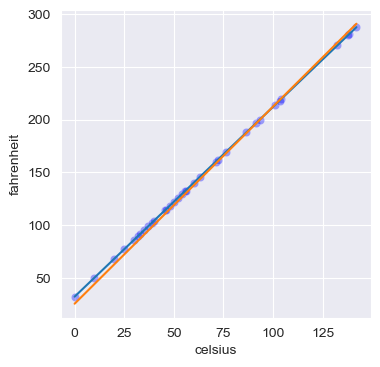

In [17]:
# Started with 2, 45
m, b, MSE = Gradent(1.87, 25.3, 0.0001, 0.0001, 2000, "Pfahrenheit", "fahrenheit")
print(m, b, MSE)